In [1]:
import numpy as np
import pandas as pd
from PIL import Image
import os
import sys
import glob
import shutil
import matplotlib.pyplot as plt
from IPython.display import display
import random

## Load rgb pixel matrix from file

In [2]:

def load_and_resize(path, size):
    resized_pics=[]
    for roots,dirs,files in os.walk(path):
        for file in files:
            filename,ext = os.path.splitext(file)
            img = Image.open(roots +"/" + file)
            img = img.resize(size, Image.ANTIALIAS)
#             display(img)
            resized_pics.append(img)
    return resized_pics

def get_rgb_pixel(resized_pics,size):
    rgb_pixs = []
    for resized_pic in resized_pics:
        resized_pix = resized_pic.load()
        rgb_pix = []
        r=[]
        g=[]
        b=[]
        for y in range(size[1]):
            row_r=[]
            row_g=[]
            row_b=[]
            row=[]
            for x in range(size[0]):
                row_r.append(resized_pix[x,y][0])
                row_g.append(resized_pix[x,y][1])
                row_b.append(resized_pix[x,y][2])
                row.append(resized_pix[x,y])
            r.append(row_r)
            g.append(row_g)
            b.append(row_b)
            rgb_pix.append(row)
        r_g_b_pix=[r,g,b]
        rgb_pixs.append(rgb_pix)
    return rgb_pixs

def show_rgb_matrix(pix_array):
    plt.imshow(pix_array)
    plt.show()

## Load grayscale pixel matrix from rgb pics

In [3]:

def convert_grayscale(resized_pics):
    grayscale_pics=[]
    for resized_pic in resized_pics:
        grayscale_pic = resized_pic.convert('L')
        grayscale_pics.append(grayscale_pic)
    return grayscale_pics

def get_grayscale_pixel(grayscale_pics,size):
    grayscale_pixs = []
    for grayscale_pic in grayscale_pics:
        grayscale_pic_pix = grayscale_pic.load()
        grayscale_pix = []
        for y in range(size[1]):
            row=[]
            for x in range(size[0]):
                row.append(grayscale_pic_pix[x,y])
            grayscale_pix.append(row)
        grayscale_pixs.append(grayscale_pix)
    return grayscale_pixs

def show_grayscale_matrix(pix_array):
    plt.imshow(pix_array,cmap='gray')
    plt.show()

In [4]:
def load_imgs(path, size):
    resized_pics=load_and_resize(original_path,size)
    grayscale_pics=convert_grayscale(resized_pics)
    rgb_pixs = get_rgb_pixel(resized_pics,size)
    grayscale_pixs = get_grayscale_pixel(grayscale_pics,size)
    return rgb_pixs, grayscale_pixs

In [5]:
M = np.array([[0.412453, 0.357580, 0.180423],
              [0.212671, 0.715160, 0.072169],
              [0.019334, 0.119193, 0.950227]])
def __rgb_to_xyz__(rgb_pixel):
    xyz_pixel = np.dot(M, rgb_pixel.T)
    xyz_pixel = xyz_pixel/255.0
    xyz_pixel = xyz_pixel[0] / 0.95047, xyz_pixel[1] / 1.0, xyz_pixel[2] / 1.08883
    return xyz_pixel

def f(im_channel):
    return np.power(im_channel, 1 / 3) if im_channel > 0.008856 else 7.787 * im_channel + 0.137931

def __xyz_to_lab__(xyz_pixel):
    F_XYZ = [f(x) for x in xyz_pixel]
    L = 116 * F_XYZ[1] - 16 if xyz_pixel[1] > 0.008856 else 903.3 * xyz_pixel[1]
    a = 500 * (F_XYZ[0] - F_XYZ[1])
    b = 200 * (F_XYZ[1] - F_XYZ[2])
    return (L, a, b)

def rgb_to_lab(rgb_pixs, size):
    lab_pixs=[]
    for rgb_pix in rgb_pixs:
        lab_pix = []
        for y in range(size[1]):
            row=[]
            for x in range(size[0]):
                xyz = __rgb_to_xyz__(np.array(rgb_pix[y][x]))
                lab = __xyz_to_lab__(xyz)
                row.append(lab)
            lab_pix.append(row)
        lab_pixs.append(lab_pix)
    return lab_pixs


In [6]:
def anti_f(im_channel):
    return np.power(im_channel, 3) if im_channel > 0.206893 else (im_channel - 0.137931) / 7.787

def __lab_to_xyz__(lab_pixel):
    fY = (lab_pixel[0] + 16.0) / 116.0
    fX = lab_pixel[1] / 500.0 + fY
    fZ = fY - lab_pixel[2] / 200.0

    x = anti_f(fX)
    y = anti_f(fY)
    z = anti_f(fZ)

    x = x * 0.95047
    y = y * 1.0
    z = z * 1.0883
    
    return (x, y, z)

def __xyz_to_rgb__(xyz_pixel):
    xyz_pixel = np.array(xyz_pixel)
    xyz_pixel = xyz_pixel * 255
    rgb = np.dot(np.linalg.inv(M), xyz_pixel.T)
    # rgb = rgb * 255
    rgb_pixel = np.uint8(np.clip(rgb, 0, 255))
    return rgb_pixel

def lab_to_rgb(lab_pixs, size):
    rgb_pixs=[]
    for lab_pix in lab_pixs:
        rgb_pix=[]
        for y in range(size[1]):
            row=[]
            for x in range(size[0]):
                xyz = __lab_to_xyz__(lab_pix[y][x])
                rgb = __xyz_to_rgb__(xyz)
                row.append(rgb)
            rgb_pix.append(row)
        rgb_pixs.append(rgb_pix)
    return rgb_pixs

In [7]:
def get_lab_channels(lab_pixs, size):
    lab_channel_pixs=[]
    for lab_pix in lab_pixs:
        channel_l=[]
        channel_a=[]
        channel_b=[]
        for y in range(size[1]):
            row_l=[]
            row_a=[]
            row_b=[]
            for x in range(size[0]):
                row_l.append(lab_pix[y][x][0])
                row_a.append(lab_pix[y][x][1])
                row_b.append(lab_pix[y][x][2])
            channel_l.append(row_l)
            channel_a.append(row_a)
            channel_b.append(row_b)

        lab_channel_pixs.append(np.array([channel_l, channel_a, channel_b]))
    return lab_channel_pixs

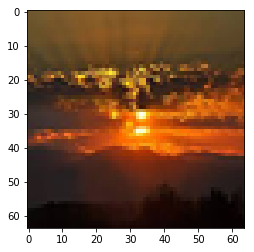

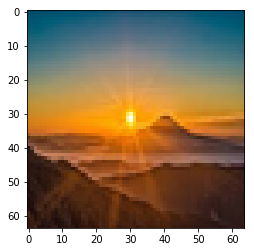

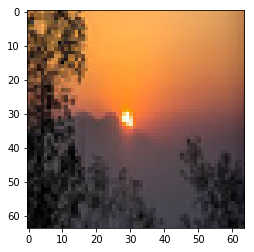

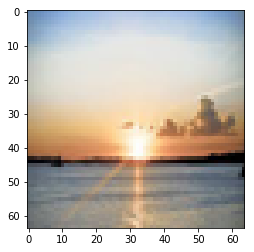

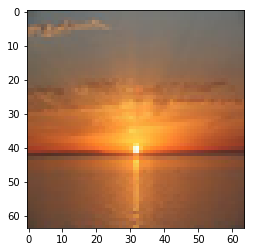

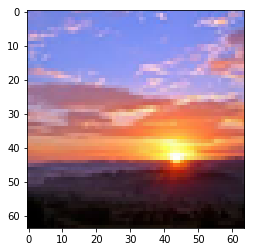

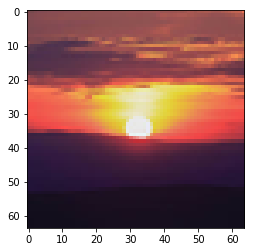

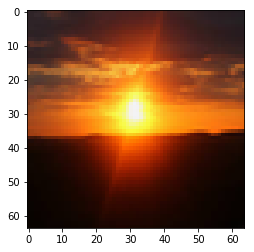

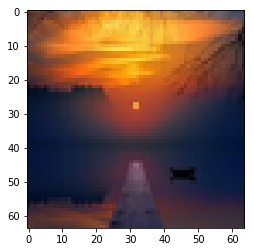

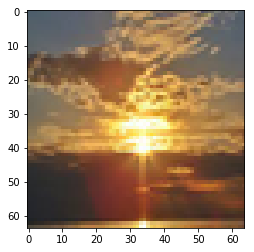

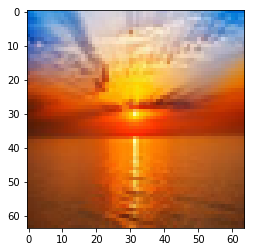

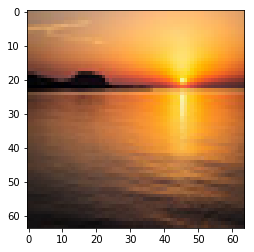

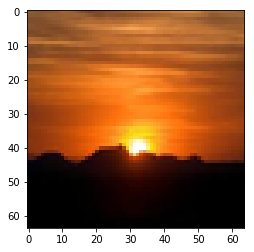

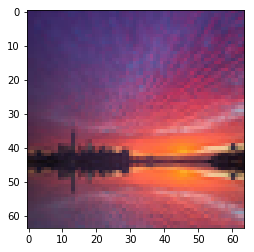

In [8]:
original_path="../../data/AIAssignment4/datasets/beach/"
size=(64,64)
rgb_pixs, grayscale_pixs = load_imgs(original_path, size)

for rgb_pix in rgb_pixs:
    show_rgb_matrix(rgb_pix)
# for grayscale_pix in grayscale_pixs:
#     show_grayscale_matrix(grayscale_pix)



In [9]:
def get_features(lab_channels_pixs):
    channel_l = []
    channel_ab = []
    for lab_channels_pix in lab_channels_pixs:
        channel_l.append(np.array(lab_channels_pix[0]).reshape(1,-1))
        channel_ab.append(np.append(np.array(lab_channels_pix[1]).reshape(1,-1), np.array(lab_channels_pix[2]).reshape(1,-1)))
    return np.array(channel_l).reshape(-1,size[0]*size[1]), np.add(np.array(channel_ab), 128)

In [10]:
import tensorflow as tf

lab_pixs = rgb_to_lab(rgb_pixs, size)
lab_channels_pixs = get_lab_channels(lab_pixs, size)



# recovered_rgb_pixs = lab_to_rgb(lab_pixs, size)
# for recovered_rgb_pix in recovered_rgb_pixs:
#     show_rgb_matrix(recovered_rgb_pix)
    
print(rgb_pixs[0][0][0])
print(lab_pixs[0][0][0])
# print(lab_channels_pixs[0][0])
features, labels = get_features(lab_channels_pixs)

train_test_split = np.random.rand(len(features)) < 0.70
train_x = features[train_test_split]
train_y = labels[train_test_split]
test_x = features[~train_test_split]
test_y = labels[~train_test_split]
print(train_test_split)

def next_batch(train_x, train_y, batch_size):
    batch_x = []
    batch_y = []
    rand_indices = []
    for i in range(batch_size):
        rand_indices.append(random.randint(0,len(train_x) - 1))
    for index in rand_indices:
        batch_x.append(train_x[index])
        batch_y.append(train_y[index])
    return [np.array(batch_x), np.array(batch_y)]
        
# train_x = train_x[0:2]
# train_y = train_y[0:2]
# test_x = test_x[0:2]
# test_y = test_y[0:2]

print(features.shape)
print(labels.shape)
print(labels.max())
print(labels.min())
print(labels[0])

(110, 87, 46)
(65.65161314514997, 0.34811562635322923, 23.344790841004183)
[ True  True False  True False False  True  True False False  True False
  True  True]
(14, 4096)
(14, 8192)
217.89315271687101
82.44522091848422
[128.34811563 128.3455148  128.05577159 ... 135.14279843 135.14279843
 135.14257813]


In [11]:
def weight_variable(shape):
    initial = tf.truncated_normal(shape,stddev=0.1)
    weight = tf.Variable(initial_value=initial)
    return weight
 
def bias_variable(shape):
    initial = tf.constant(0.1,shape=shape)
    bias = tf.Variable(initial_value=initial)
    return bias
 
def conv_op(in_tensor, kernel, strides=[1,1,1,1], padding='SAME'):
    conv_out = tf.nn.conv2d(in_tensor, kernel, strides=strides, padding=padding)
    return conv_out
 
def max_pool_2x2(in_tensor,ksize=[1,2,2,1],strides=[1,2,2,1],padding='SAME'):
    max_pool = tf.nn.max_pool(in_tensor, ksize, strides, padding)
    return max_pool


In [12]:
sess = tf.InteractiveSession()

In [13]:
with tf.device("/gpu:0"):
    x = tf.placeholder(tf.float32, [None, size[0]*size[1]])
    y_ = tf.placeholder(tf.float32, [None, size[0]*size[1]*2])
    x_image = tf.reshape(x,[-1, size[1], size[0], 1]) # 28*28 pic of 1 channel


    w1 = [5,5,1,32]
    b1 = [32]
    w2 = [5,5,32,64]
    b2 = [64]
    wfc1 = [size[0]*size[1]*4,2048] # size *4
    bfc1 = [2048]
    wfc2 = [2048, 4096]
    bfc2 = [4096]
    wfc3 = [4096, size[1]*size[0]*2]
    bfc3 = [size[1]*size[0]*2]

    W_conv1 = weight_variable(w1)
    b_conv1 = bias_variable(b1)
    h_conv1 = tf.nn.relu(conv_op(x_image, W_conv1)+b_conv1)
    h_pool1 = max_pool_2x2(h_conv1)

    W_conv2 = weight_variable(w2)
    b_conv2 = bias_variable(b2)
    h_conv2 = tf.nn.relu(conv_op(h_pool1, W_conv2)+b_conv2)
    h_pool2 = max_pool_2x2(h_conv2)

    h_pool2_flat = tf.reshape(h_pool2,[-1,size[0]*size[1]*4])
    W_fc1 = weight_variable(wfc1)
    b_fc1 = bias_variable(bfc1)
    h_fc1 = tf.nn.relu(tf.matmul(h_pool2_flat, W_fc1)+b_fc1)

    W_fc2 = weight_variable(wfc2)
    b_fc2 = bias_variable(bfc2)
    h_fc2 = tf.nn.relu(tf.matmul(h_fc1, W_fc2)+b_fc2)

    keep_prob = tf.placeholder(tf.float32)
    h_fc2_drop = tf.nn.dropout(h_fc2,keep_prob)

    W_fc3 = weight_variable(wfc3)
    b_fc3 = bias_variable(bfc3)

    y_conv_t = tf.matmul(h_fc2_drop, W_fc3)+b_fc3
    y_conv = tf.divide(y_conv_t, tf.reduce_max(y_conv_t))*256

    loss_func = tf.reduce_mean(tf.square(y_-y_conv))
    train_step = tf.train.GradientDescentOptimizer(0.0001).minimize(loss_func)

    correct_prediction = tf.less_equal(tf.abs(y_conv - y_), 10.0)
    accuarcy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))    

    tf.global_variables_initializer().run()
    for i in range(8000):
        batch = next_batch(train_x, train_y, 3)
        if i%100 == 0:
            train_accuracy = accuarcy.eval(feed_dict={x:batch[0] ,y_:batch[1], keep_prob:1.0}) # testify, or prediction
            print('step %d, training accuarcy %g'%(i, train_accuracy))
            print(y_conv.eval(feed_dict={x:features[0].reshape(1,-1),y_:labels[0].reshape(1,-1),keep_prob:1.0}, session=sess))
            print("test accuracy %g"%accuarcy.eval(feed_dict={x:test_x,y_:test_y,keep_prob:1.0}))

        train_step.run(feed_dict={x:batch[0] ,y_:batch[1], keep_prob:1.0})


    # prediction = sess.run(y_conv, feed_dict={x:features[0].reshape(1,-1), keep_prob:1.0})
    print(y_conv.eval(session=sess,feed_dict={x:features[0].reshape(1,-1),y_:labels[0].reshape(1,-1),keep_prob:1.0}))


step 0, training accuarcy 0.0117188
[[ -9.055575  -4.862918 -58.678856 ...  34.658558  10.83962  -88.11075 ]]
test accuracy 0.0163778
step 100, training accuarcy 0.0953776
[[59.225525  50.962193  78.07423   ... 30.066576  78.221306  -7.0215173]]
test accuracy 0.0883993
step 200, training accuarcy 0
[[16.254198 12.836844 19.460932 ... 14.849271 14.348721  8.545284]]
test accuracy 0
step 300, training accuarcy 8.13802e-05
[[7.670297  7.510541  9.671058  ... 8.104455  8.82905   7.9052672]]
test accuracy 0
step 400, training accuarcy 4.06901e-05
[[ 9.030086   7.8168473 11.317657  ... 10.091614  13.964071   9.807164 ]]
test accuracy 0
step 500, training accuarcy 0
[[12.624773 14.849807 13.504233 ... 14.867284 15.314878 14.071948]]
test accuracy 0
step 600, training accuarcy 0
[[12.170985 11.779329 10.949755 ... 12.272561 14.618542 11.614715]]
test accuracy 0
step 700, training accuarcy 0
[[14.174305  12.441439  13.591511  ... 13.7947035 13.806496  13.003556 ]]
test accuracy 0
step 800, trai

step 6600, training accuarcy 0.599243
[[133.86737 133.2549  134.143   ... 136.90413 137.26811 137.31822]]
test accuracy 0.315674
step 6700, training accuarcy 0.268758
[[146.98802 146.34106 147.5015  ... 150.35599 150.8239  150.94855]]
test accuracy 0.374532
step 6800, training accuarcy 8.13802e-05
[[81.88356 81.43793 81.96205 ... 83.86416 83.88945 84.18897]]
test accuracy 0.000712077
step 6900, training accuarcy 0.546997
[[138.29231 137.63016 138.34976 ... 141.23352 141.85387 141.70642]]
test accuracy 0.350301
step 7000, training accuarcy 0.554688
[[136.66559 136.00363 136.57309 ... 139.33875 140.02704 139.84464]]
test accuracy 0.314657
step 7100, training accuarcy 0.437012
[[137.35463 137.06616 137.7411  ... 140.43896 141.19376 140.78981]]
test accuracy 0.30422
step 7200, training accuarcy 0.410563
[[123.80319  123.38676  124.04247  ... 126.16013  126.862976 126.664085]]
test accuracy 0.221741
step 7300, training accuarcy 0.718628
[[129.06895 128.4949  129.24977 ... 131.46654 132.1755

Grayscale:


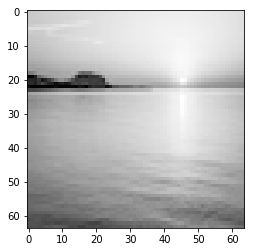

RGB:


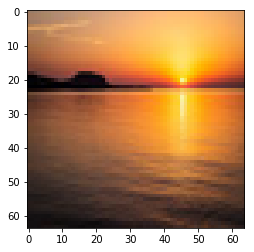

Prediction:


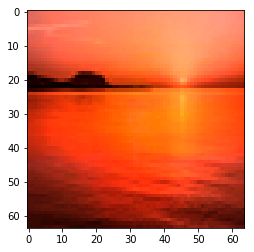

In [15]:
# pred_index = 1

pred_index = random.randint(0,len(test_x) - 1)
feature = test_x[pred_index]
label = test_y[pred_index]

# pred_index = random.randint(0,len(train_x) - 1)
# feature = train_x[pred_index]
# label = train_y[pred_index]

# print(labels[pred_index])
prediction = sess.run(y_conv, feed_dict={x:feature.reshape(1,-1), keep_prob:1.0})

def lab_channel_to_rgb(channel_l, channel_ab, size):
    channel_ab=channel_ab.reshape(2,-1)
    a = channel_ab[0].reshape(size[1],size[0])
    b = channel_ab[1].reshape(size[1],size[0])
    a = np.subtract(a, 128)
    b = np.subtract(b, 128)
    l = channel_l.reshape(size[1],size[0])
    pred_lab_pix = []
    for y in range(size[1]):
        row=[]
        for x in range(size[0]):
            lab_pixel = (l[y][x], a[y][x], b[y][x])
            row.append(lab_pixel)
        pred_lab_pix.append(row)
    pred_lab_pixs = []
    pred_lab_pixs.append(pred_lab_pix)

    # print(pred_lab_pixs[0][0])
    # print(len(pred_rgb_pix))
    # print(len(pred_rgb_pix[0]))
    pred_rgb_pix = lab_to_rgb(pred_lab_pixs, size)
    return pred_rgb_pix
print('Grayscale:')
show_grayscale_matrix(feature.reshape(size[1],size[0]))
print('RGB:')
show_rgb_matrix(lab_channel_to_rgb(feature, label, size)[0])
print('Prediction:')
show_rgb_matrix(lab_channel_to_rgb(feature, prediction,size)[0])

